# Dataset overview

Problem

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.


Dataset
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.
Input variables:
- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels
Outcomes:
- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

Źródło:
https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import sys
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    KFold
)
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    fbeta_score, 
    roc_auc_score,
    classification_report,
    accuracy_score,
    make_scorer
)
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from tabulate import tabulate

from helpers import data_preparation, plot_helper, my_imputer, results_func


from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [5]:
data_raw = pd.read_csv("Train_nyOWmfK.csv", encoding='unicode_escape')

In [6]:
pd.set_option('display.max_columns', None)

# 1. Basics info

In [7]:
# Importing data

In [8]:
data_raw.head(3)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,200000.0,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

**Conclusion**


# 2. Exploratory Data Analysis

**checking NaN values**

In [10]:
na_column_list = [col for col in data_raw.columns if data_raw[col].isna().sum()> 0]

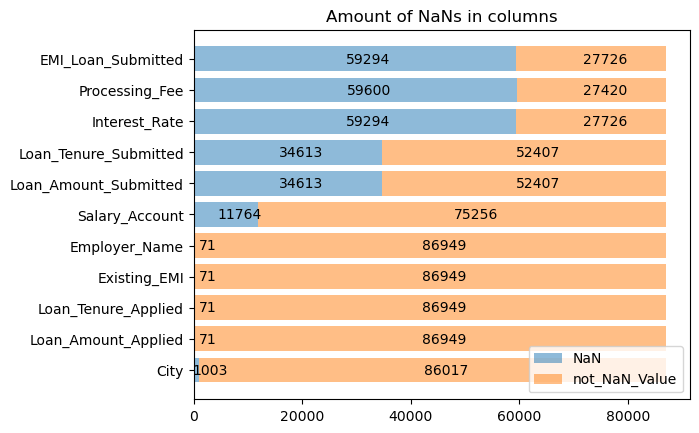

In [11]:
plotter = plot_helper.NanPlotter(na_column_list)
plotter.bar_chart_plotter(data_raw)

**Target distribution** 


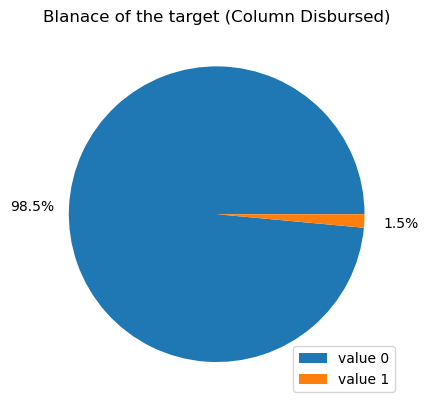

In [12]:
plt.pie(data_raw['Disbursed'].value_counts()/len(data_raw['Disbursed']), autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)

plt.title("Blanace of the target (Column Disbursed)")
plt.legend(['value 0', 'value 1'], loc=4)
plt.show()

# Plotting histograms for numerical columns

In [13]:
int_columns = ["Monthly_Income", "Loan_Amount_Applied", "Loan_Tenure_Applied", "Existing_EMI", 
               "Var5", "Loan_Amount_Submitted", "Loan_Tenure_Submitted", "Interest_Rate", "Processing_Fee", 
              "EMI_Loan_Submitted", "Var4"]

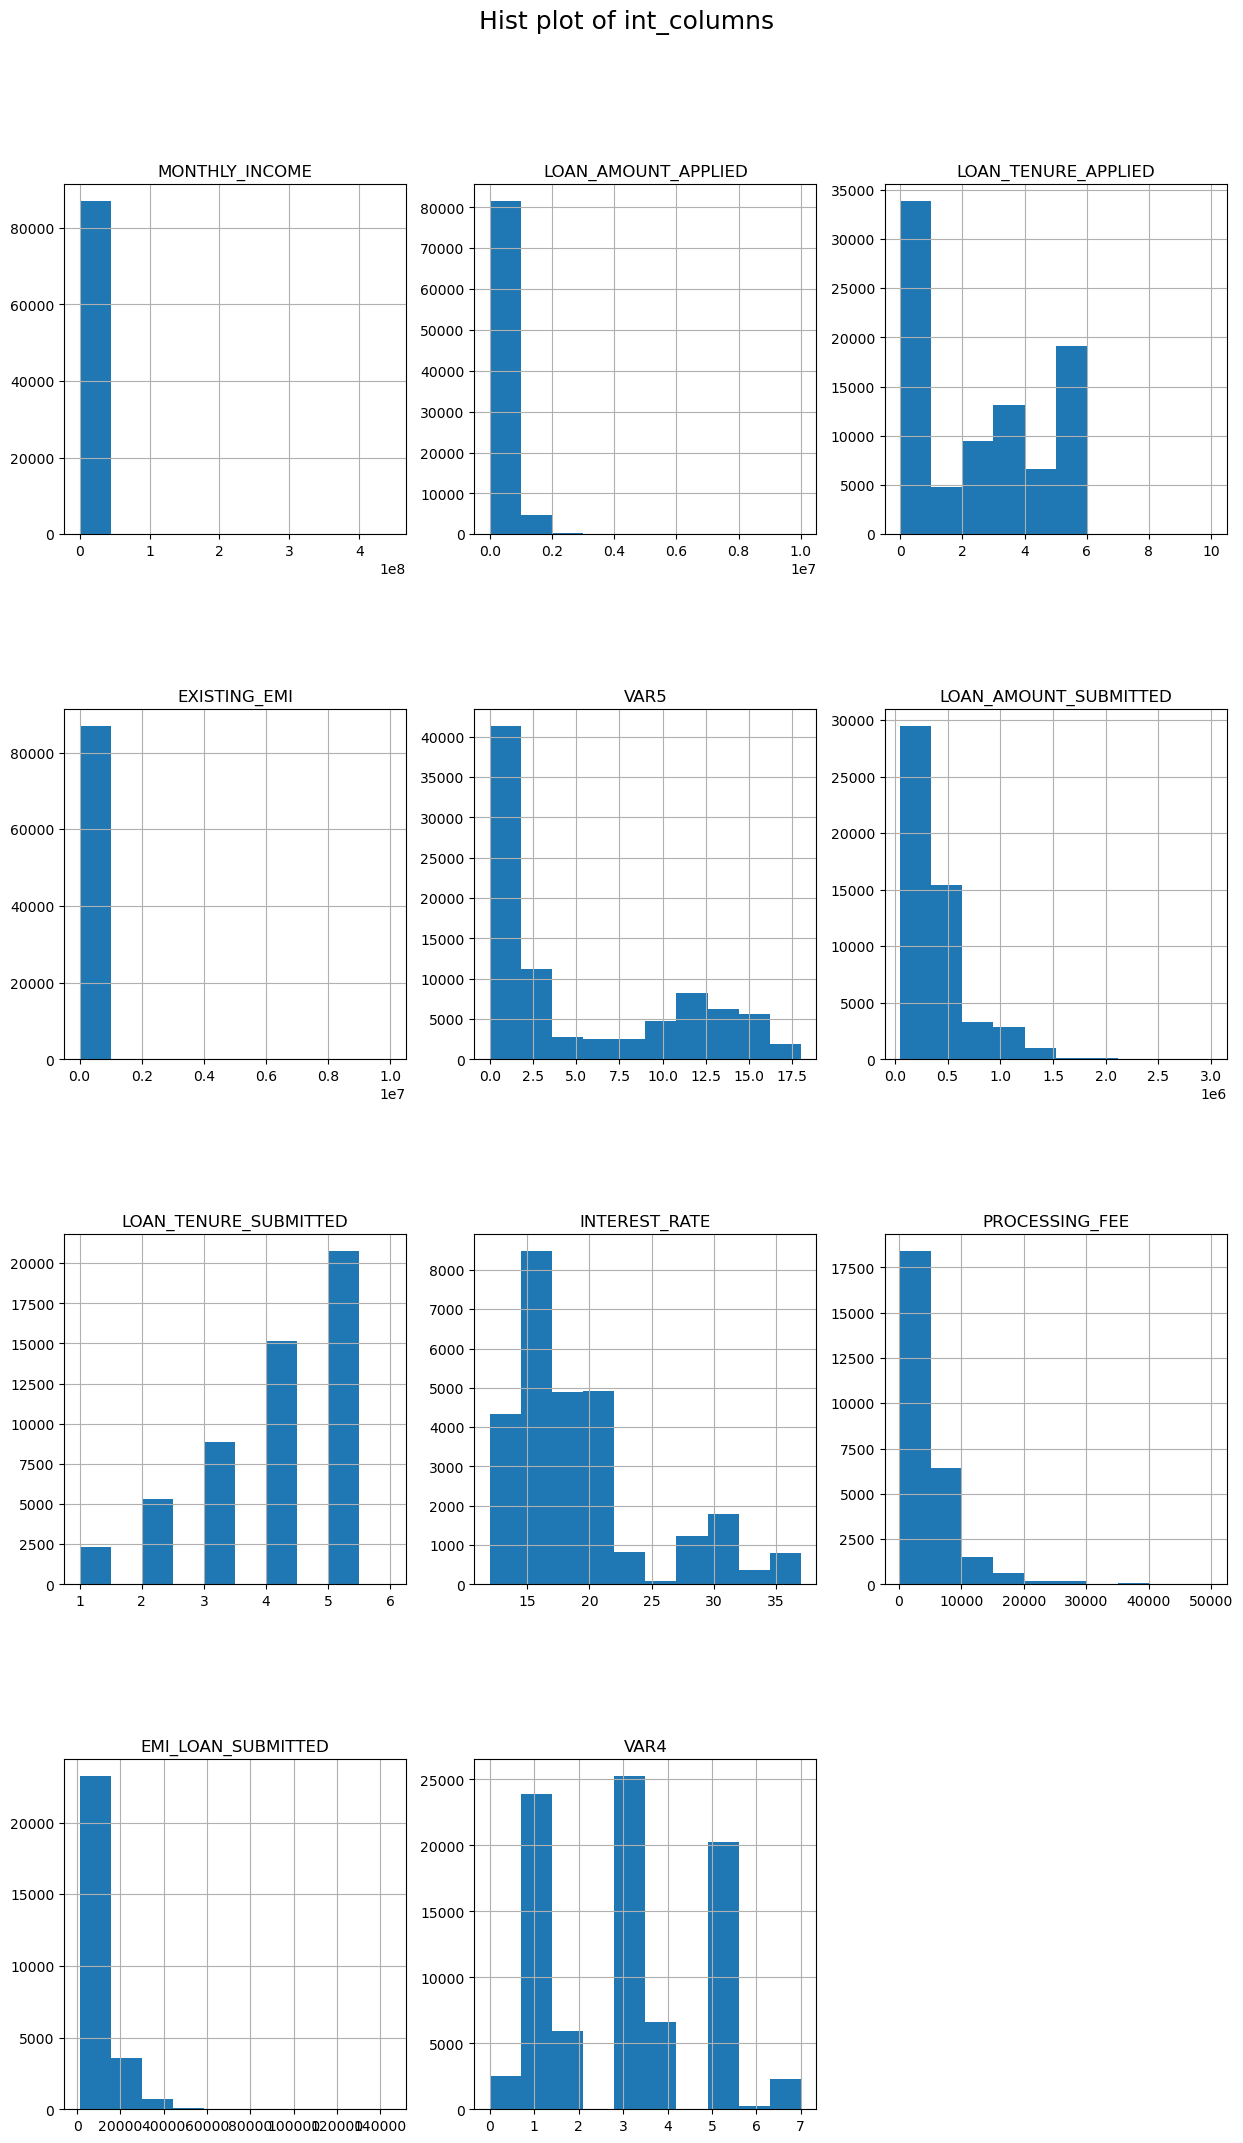

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 25))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Hist plot of int_columns", fontsize=18, y=0.95)


for col, ax in zip(int_columns, axs.ravel()):
    data_raw[col].hist(ax=ax)
    ax.set_title(col.upper())
    ax.set_xlabel("")
fig.delaxes(axs[-1,-1])
plt.show()

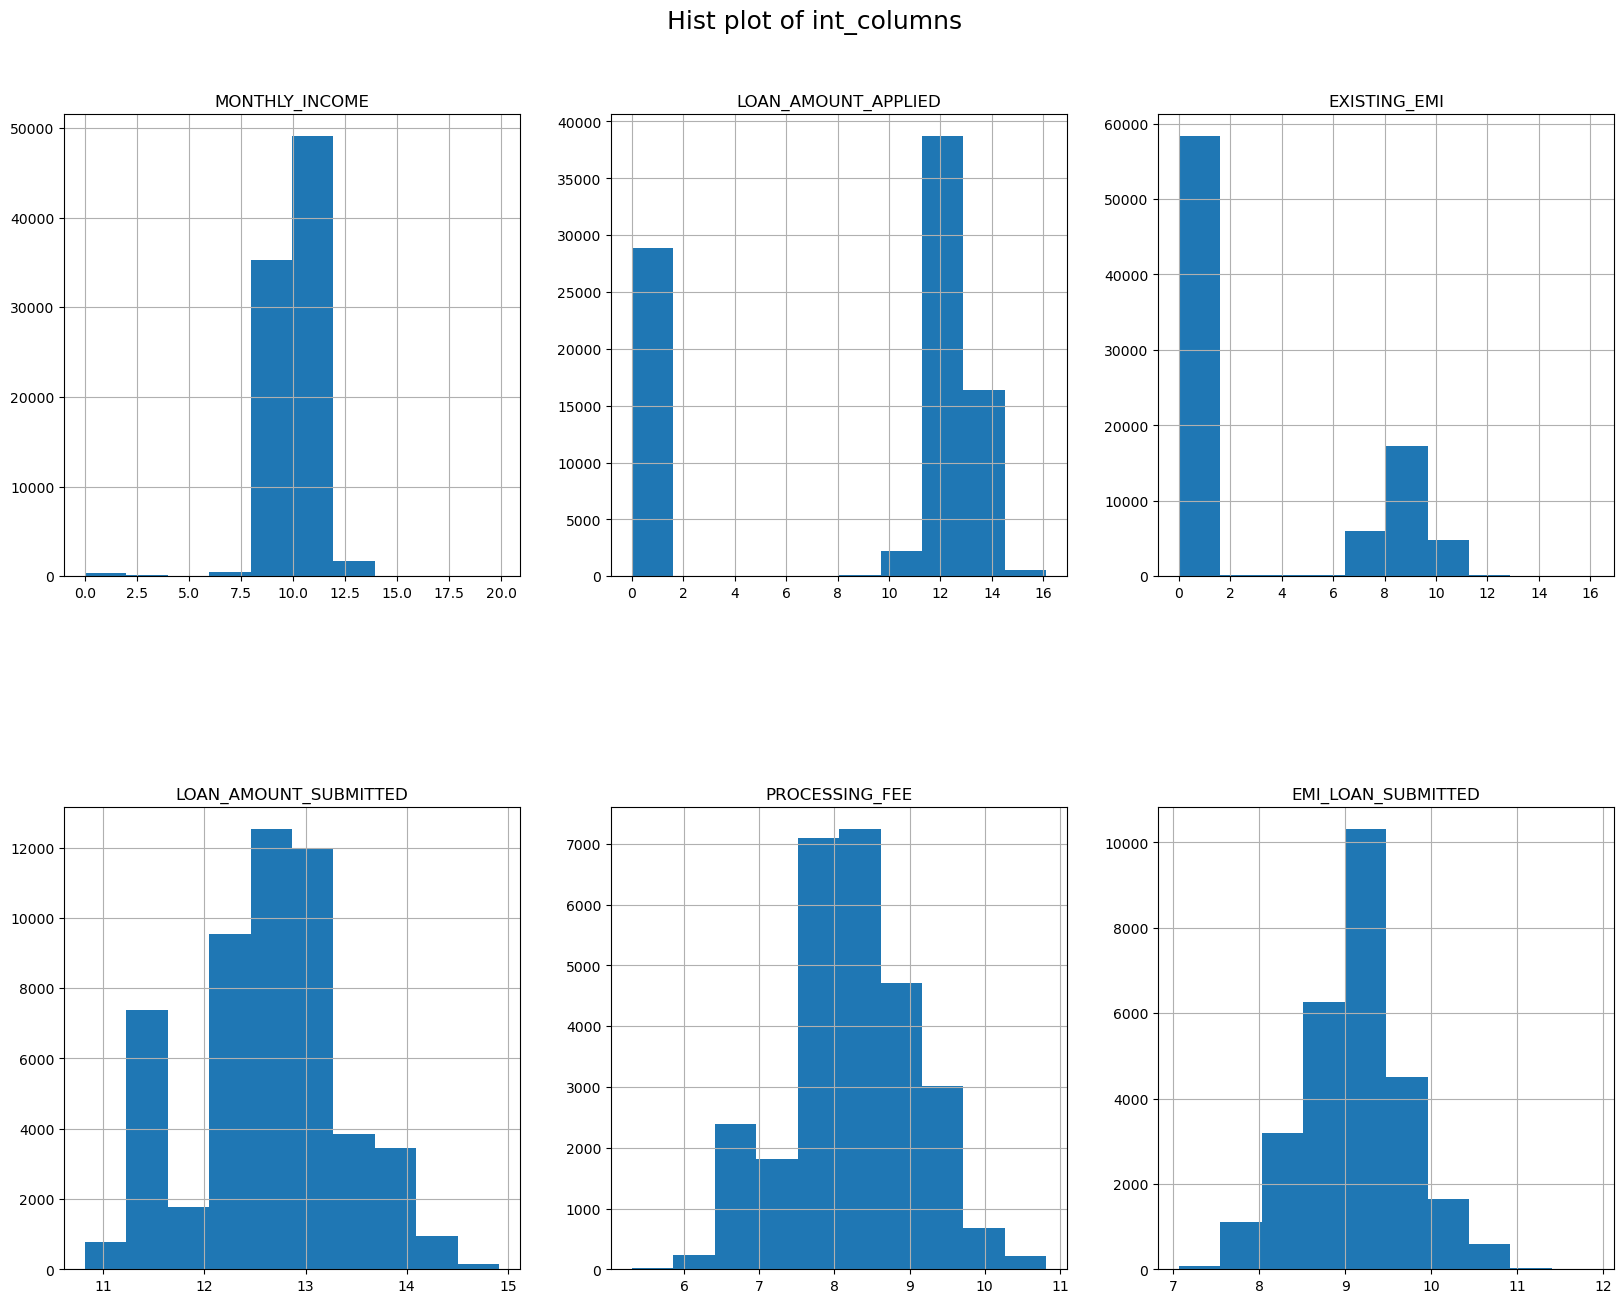

In [15]:
log_features_list = ['Monthly_Income', 'Loan_Amount_Applied', 'Existing_EMI', 
                     'Loan_Amount_Submitted', 'Processing_Fee', 'EMI_Loan_Submitted']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Hist plot of int_columns", fontsize=18, y=0.95)


for col, ax in zip(log_features_list, axs.ravel()):
    np.log1p(data_raw[col]).hist(ax=ax)
    ax.set_title(col.upper())
    ax.set_xlabel("")
plt.show()

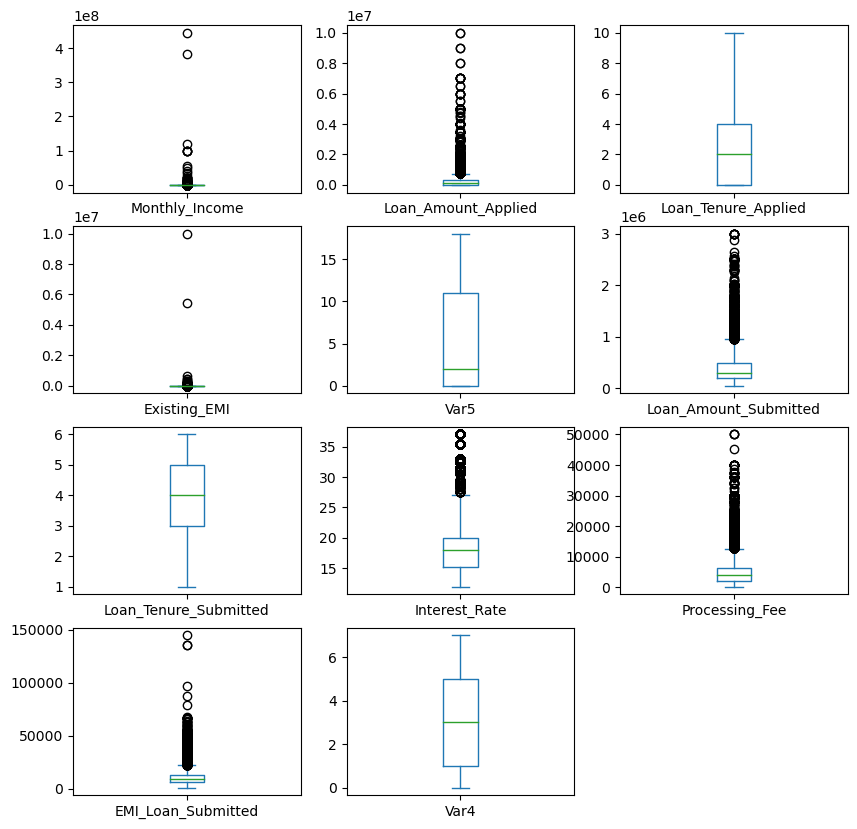

In [16]:
# Plotting box plots for each feature in the dataset
data_raw[int_columns].plot(kind="box", subplots=True, layout=(4,3), figsize=(10,10))

plt.show()

Maybe It is worthy to check Log function 

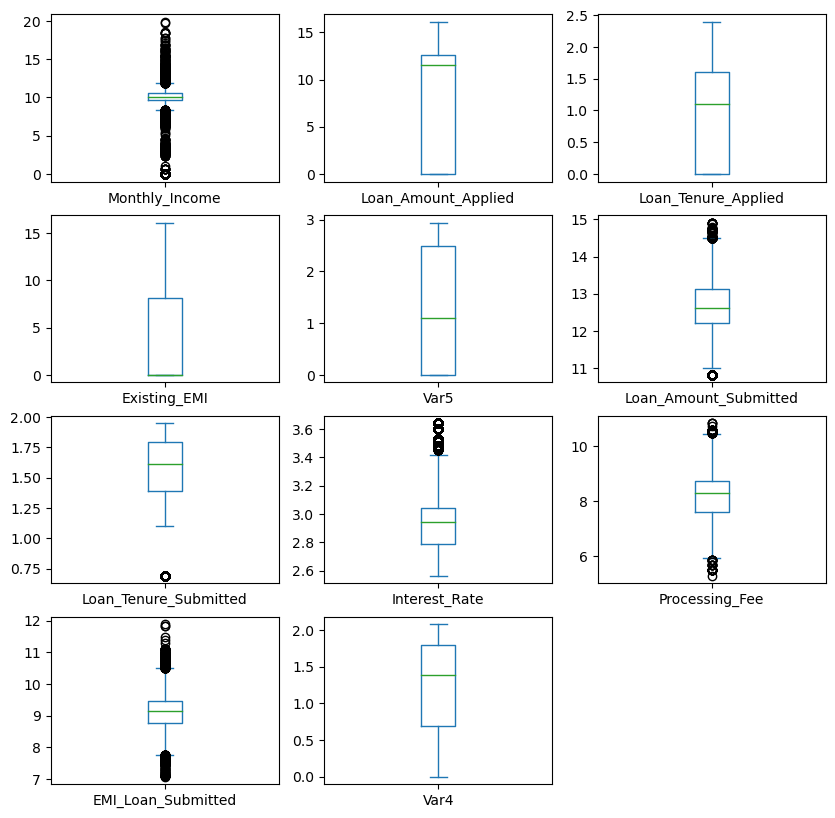

In [17]:
np.log1p(data_raw[int_columns]).plot(kind="box", subplots=True, layout=(4,3), figsize=(10,10))

plt.show()

In [18]:
cat_features_data_raw = [col for col in list(data_raw.columns) if data_raw[col].dtypes == object  ]

In [19]:
num_of_unique = {'number of unique values': [len(data_raw[i].unique()) for i in cat_features_data_raw]}
num_of_unique_df = pd.DataFrame(num_of_unique, index=[cat_features_data_raw])
  

In [20]:
num_of_unique_df

,number of unique values
ID,87020
Gender,2
City,698
DOB,11345
Lead_Creation_Date,92
Employer_Name,43568
Salary_Account,58
Mobile_Verified,2
Var1,19
Filled_Form,2


Lots of unique values in columns: City, Employer_Name, DOB, Lead_Creation_Date, Salary_Account.
Next steps to do:
1) Group cities by 3 categories : Big, Medium, Small
2) Any Value in Employer Name change to 1
3) Any Value in Salary_Account change to 1
4) combine DOB and Lead_Creation_Date to an Age of the person on lead  creation date


In [21]:
data = data_raw.drop(['ID', 'Disbursed', 'LoggedIn'], axis=1)

In [22]:
employer = data_preparation.EmployerDataPreparation()
salary = data_preparation.SalaryAccountDataPreparation(data)
city = data_preparation.CityDataPreparation(data)
age = data_preparation.AgeDataPreparation(data)
other = data_preparation.OtherSimpleEncoding(data)

# step 1

* over 10 mln people: ['Delhi', 'Mumbai', 'Kolkata', 'Bengaluru', 'Chennai', 'Hyderabad']  


* from 2 to 10 mln people ['Ahmadabad', 'Surat', 'Pune', 'Jaipur', 'Lucknow', 'Kozhikode', 'Malappuram', 
                            #'Thrissur', 'Kochi', 'Kanpur',  'Indore', 'Nagpur', 'Coimbatore', 'Thiruvananthapuram', 'Patna', 
                            #'Bhopal', 'Agra', 'Vadodara', 'Kannur', 'Visakhapatnam', 'Nashik', 'Vijayawada'] 


* less then 2 mln people: all other


In [23]:
data['City'] = data['City'].apply(lambda x: city.big_medium_small_city_groupping(x))

# step 2

In [24]:
data['Employer_Name'] = data['Employer_Name'].apply(lambda x: employer.zero_one_encoding_employer(x))

# step 3

In [25]:
data['Salary_Account'] = data['Salary_Account'].apply(lambda x: salary.zero_one_encoding_salary_account(x)) 

# step 4

In [26]:
data['Age'] = age.age_counter()

In [27]:
data = data.drop(['DOB', 'Lead_Creation_Date'], axis=1)

In [28]:
cat_features = [col for col in list(data.columns) if data[col].dtypes == object  ]
num_of_unique_after_4_steps = {'number of unique values': [len(data[i].unique()) for i in cat_features]}
num_of_unique_df = pd.DataFrame(num_of_unique_after_4_steps, index=[cat_features])
num_of_unique_df

,number of unique values
Gender,2
City,4
Mobile_Verified,2
Var1,19
Filled_Form,2
Device_Type,2
Var2,7
Source,30


Redefining values in columns Gender,  Mobile_Verified, Filled_Form, Device_Type for binary column 0/1

In [29]:
data['Mobile_Verified'] = other.mobile_verified_encoding() # 1 - Yes, 0 - No
data["Filled_Form"] = other.filled_form_encoding() # 1 - Yes, 0 - No
data["Gender"] = other.gender_encoding() # 1 - Female, 2- Male
data["Device_Type"] = other.device_encoding() # 1 - Mobile, 0 - Web-browser 

In [30]:
cat_features = [col for col in list(data.columns) if data[col].dtypes == object  ]
num_of_unique_after_4_steps = {'number of unique values': [len(data[i].unique()) for i in cat_features]}
num_of_unique_df = pd.DataFrame(num_of_unique_after_4_steps, index=[cat_features])
num_of_unique_df

,number of unique values
City,4
Var1,19
Var2,7
Source,30


In [31]:
data.head(5)

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Age
0,1,big_city,20000,300000.0,5.0,0.0,1.0,1.0,0,0,HBXX,NaN,NaN,NaN,NaN,NaN,0,0,G,S122,1,37.0
1,0,big_city,35000,200000.0,2.0,0.0,1.0,1.0,1,13,HBXA,200000.0,2.0,13.25,NaN,6762.9,0,0,G,S122,3,30.0
2,0,small_city,22500,600000.0,4.0,0.0,1.0,1.0,1,0,HBXX,450000.0,4.0,NaN,NaN,NaN,0,0,B,S143,1,34.0
3,0,small_city,35000,1000000.0,5.0,0.0,1.0,1.0,1,10,HBXX,920000.0,5.0,NaN,NaN,NaN,0,0,B,S143,3,27.0
4,0,big_city,100000,500000.0,2.0,25000.0,1.0,1.0,1,17,HBXX,500000.0,2.0,NaN,NaN,NaN,0,0,B,S134,3,31.0


# Missing Values

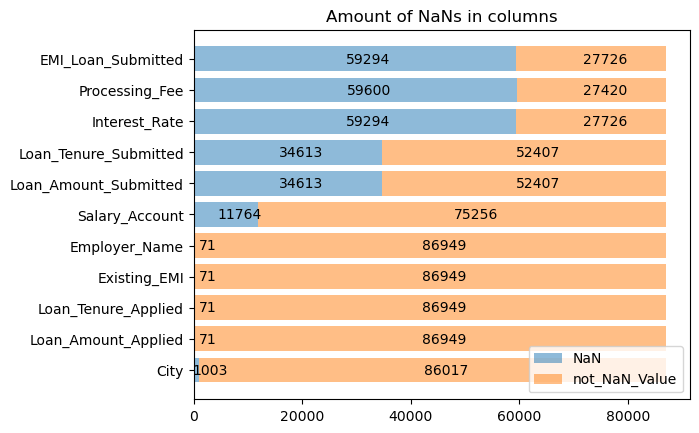

In [32]:
plotter = plot_helper.NanPlotter(na_column_list)
plotter.bar_chart_plotter(data)

analiza Loan Tenure oraz Loan Amount

In [33]:
repeating_values = {'repeating value': [len(data_raw[data_raw["Loan_Tenure_Applied"] == data_raw["Loan_Tenure_Submitted"]]),
                                            len(data_raw[data_raw["Loan_Amount_Applied"] == data_raw["Loan_Amount_Submitted"]])],
                         
                        'NaN in Submitted': [data_raw["Loan_Tenure_Submitted"].isna().sum(), data_raw["Loan_Amount_Submitted"].isna().sum()]}
repeating_values_df = pd.DataFrame(repeating_values, index=['Tenure_Applied/Submitted', 'Amount_Applied/Submitted'])
repeating_values_df

,repeating value,NaN in Submitted
Tenure_Applied/Submitted,30455,34613
Amount_Applied/Submitted,26091,34613


Removi

In [34]:
my_imputer.city_salary_imputer(data)
my_imputer.tenure_amount_imputer(data)

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Age
0,1,big_city,20000,300000.0,5.0,0.0,1.0,1.0,0,0,HBXX,300000.0,5.0,NaN,NaN,NaN,0,0,G,S122,1,37.0
1,0,big_city,35000,200000.0,2.0,0.0,1.0,1.0,1,13,HBXA,200000.0,2.0,13.25,NaN,6762.90,0,0,G,S122,3,30.0
2,0,small_city,22500,600000.0,4.0,0.0,1.0,1.0,1,0,HBXX,450000.0,4.0,NaN,NaN,NaN,0,0,B,S143,1,34.0
3,0,small_city,35000,1000000.0,5.0,0.0,1.0,1.0,1,10,HBXX,920000.0,5.0,NaN,NaN,NaN,0,0,B,S143,3,27.0
4,0,big_city,100000,500000.0,2.0,25000.0,1.0,1.0,1,17,HBXX,500000.0,2.0,NaN,NaN,NaN,0,0,B,S134,3,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,1,small_city,71901,1000000.0,5.0,14500.0,1.0,1.0,0,9,HBXX,1000000.0,5.0,NaN,NaN,NaN,0,0,G,S122,3,46.0
87016,1,medium_city,16000,0.0,0.0,0.0,1.0,1.0,1,1,HBXB,240000.0,4.0,35.50,4800.0,9425.76,1,1,G,S122,5,25.0
87017,0,big_city,118000,0.0,0.0,0.0,1.0,1.0,1,8,HBXX,1200000.0,4.0,NaN,NaN,NaN,0,1,G,S122,3,44.0
87018,0,big_city,98930,800000.0,5.0,13660.0,1.0,1.0,1,18,HBXX,800000.0,5.0,NaN,NaN,NaN,0,0,G,S122,3,38.0


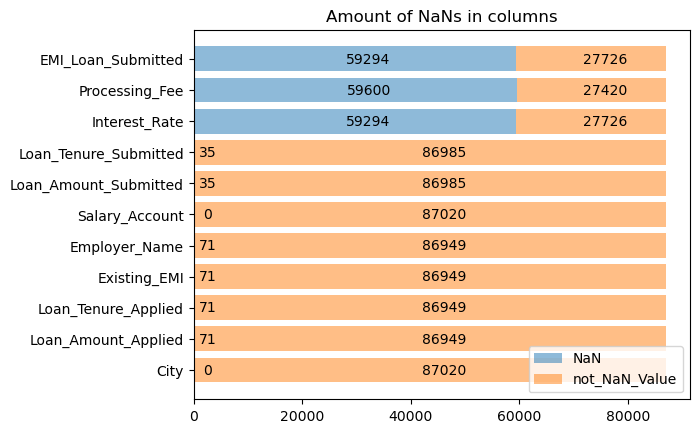

In [35]:
plotter = plot_helper.NanPlotter(na_column_list)
plotter.bar_chart_plotter(data)

In [36]:
X = data
y = data_raw['Disbursed']

* NaN values in EMI_Loan_Submitted, PRocessing_Fee, Interest_Rate doesn't mean that loan was not disbursed. 
* Filling NaNs with value 0 as 0 is not present in any of those columns

# Pipeline

In [37]:
cat_features = [col for col in list(X.columns) if X[col].dtypes == object  ]

In [38]:
num_features = [col for col in list(X.columns) if X[col].dtypes != object  ]

In [39]:
all_columns = num_features + cat_features

In [40]:
log_features_list = ['Monthly_Income', 'Loan_Amount_Applied', 'Existing_EMI', 
                     'Loan_Amount_Submitted', 'Processing_Fee', 'EMI_Loan_Submitted']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
log_transformer = FunctionTransformer(np.log1p)

In [81]:
num_pipe = Pipeline([
    ("log_transformer", ColumnTransformer([
        ("log", log_transformer, log_features_list)], remainder='passthrough')),
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer())
])

cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop = "first", handle_unknown = "ignore"))
])


preprocessor = ColumnTransformer(transformers=[
    ("numeric", num_pipe, num_features),
    ("categorical", cat_pipe, cat_features)
])

# preprocessor.fit(X)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", 'passthrough')
], memory='cache')

cv_schema = KFold(5, shuffle=True) # dane są duże i dla 5 będzie szybciej

param_grid = [
    
    {
    'model':[LogisticRegression(n_jobs  = -1, max_iter = 10000)],
    "model__class_weight": [{0:1, 1:50}, {0:1, 1:80}, {0:1, 1:100}],
    "model__C": [0.01, 0.1, 1, 10, 100, 1000]
        
    },
     {
     "model": [RandomForestClassifier()],
     "model__n_estimators": [100],
     "model__min_samples_leaf": [50, 80, 100],
     "model__max_samples": [0.5, 0.8, 1],
     "model__class_weight": [{0:1, 1:50}, {0:1, 1:80}, {0:1, 1:100}]
     },
#     {
#     "model": [KNeighborsClassifier()],
#     "model__n_neighbors": [2, 7, 9, 15],
#     "model__p": [1, 2],
#     "model__weights": ['uniform', 'distance']
#     }
]


optimizer_base = GridSearchCV(pipeline,
                         param_grid, 
                         scoring="roc_auc", 
                         cv=cv_schema, 
                         n_jobs=-1)

In [82]:
optimizer_base.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(memory='cache',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('log_transformer',
                                                                                          ColumnTransformer(remainder='passthrough',
                                                                                                            transformers=[('log',
                                                                                                                           FunctionTransformer(func=<ufunc 'log1p'>),
                                                                                                                           ['Monthly_Income',
                                                                                                                            'Loan_Amount_Applied',
                                                                                                                            'Exist...
                          'model__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'model__class_weight': [{0: 1, 1: 50}, {0: 1, 1: 80},
                                                  {0: 1, 1: 100}]},
                         {'model': [RandomForestClassifier(class_weight={0: 1,
                                                                         1: 50},
                                                           max_samples=0.8,
                                                           min_samples_leaf=50)],
                          'model__class_weight': [{0: 1, 1: 50}, {0: 1, 1: 80},
                                                  {0: 1, 1: 100}],
                          'model__max_samples': [0.5, 0.8, 1],
                          'model__min_samples_leaf': [50, 80, 100],
                          'model__n_estimators': [100]}],
             scoring='roc_auc')

In [83]:
optimizer_base.best_params_

{'model': RandomForestClassifier(class_weight={0: 1, 1: 50}, max_samples=0.8,
                        min_samples_leaf=50),
 'model__class_weight': {0: 1, 1: 50},
 'model__max_samples': 0.8,
 'model__min_samples_leaf': 50,
 'model__n_estimators': 100}

In [84]:
y_pred = optimizer_base.best_estimator_.predict(X_test)

C:\Users\arkur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [85]:
results = []

In [86]:
y_proba, roc_auc_test, results_df = results_func.results_printer(X_test, y_test, optimizer_base, results)

C:\Users\arkur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\arkur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [87]:
results_df

,best clf name,Test F1,Test Recall,Test Precision,Test ROC AUC
0,RandomForestClassifier,0.104983,0.550761,0.058021,0.829917


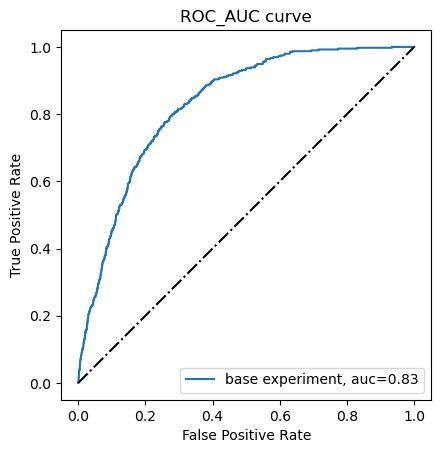

In [88]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba)
plt.plot(fpr,tpr,label="base experiment, auc="+str(roc_auc_test.round(3)))

plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),linestyle='-.',color='k')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC curve")

plt.legend(loc=4)
plt.show()

# Balancing Class Experiment

In [51]:
data.head()

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Age
0,1,big_city,20000,300000.0,5.0,0.0,1.0,1.0,0,0,HBXX,300000.0,5.0,NaN,NaN,NaN,0,0,G,S122,1,37.0
1,0,big_city,35000,200000.0,2.0,0.0,1.0,1.0,1,13,HBXA,200000.0,2.0,13.25,NaN,6762.9,0,0,G,S122,3,30.0
2,0,small_city,22500,600000.0,4.0,0.0,1.0,1.0,1,0,HBXX,450000.0,4.0,NaN,NaN,NaN,0,0,B,S143,1,34.0
3,0,small_city,35000,1000000.0,5.0,0.0,1.0,1.0,1,10,HBXX,920000.0,5.0,NaN,NaN,NaN,0,0,B,S143,3,27.0
4,0,big_city,100000,500000.0,2.0,25000.0,1.0,1.0,1,17,HBXX,500000.0,2.0,NaN,NaN,NaN,0,0,B,S134,3,31.0


In [52]:
sm = SMOTE()

In [91]:
OneHotEncoder?

In [53]:
num_pipe = Pipeline([
    ("log_transformer", ColumnTransformer([
        ("log", log_transformer, log_features_list)], remainder='passthrough')),
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer())
])

cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop = "first", handle_unknown = "ignore"))
])


preprocessor = ColumnTransformer(transformers=[
    ("numeric", num_pipe, num_features),
    ("categorical", cat_pipe, cat_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('smote', sm),
    ("model", 'passthrough')
], memory='cache')

cv_schema = KFold(5, shuffle=True) # dane są duże i dla 5 będzie szybciej

param_grid = [
    {
    'model':[LogisticRegression(n_jobs  = -1, max_iter = 10000)],
    "model__class_weight": [None],
    "model__C": [0.01, 0.1, 1, 10, 100, 1000]
        
    },
     {
     "model": [RandomForestClassifier()],
     "model__n_estimators": [100],
     "model__min_samples_leaf": [50, 80,],
     "model__max_samples": [0.5, 0.8],
     "model__class_weight": [None]
     }
#     {
#     "model": [KNeighborsClassifier()],
#     "model__n_neighbors": [2, 7, 9, 15],
#     "model__p": [1, 2],
#     "model__weights": ['uniform', 'distance']
#     }
]


optimizer_smote = GridSearchCV(pipeline,
                         param_grid, 
                         scoring="roc_auc", 
                         cv=cv_schema, 
                         n_jobs=-1)

In [54]:
optimizer_smote.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(memory='cache',
                                steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('log_transformer',
                                                                                          ColumnTransformer(remainder='passthrough',
                                                                                                            transformers=[('log',
                                                                                                                           FunctionTransformer(func=<ufunc 'log1p'>),
                                                                                                                           ['Monthly_Income',
                                                                                                                            'Loan_Amount_Applied',
                                                                                                                            'Exist...
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(max_iter=10000,
                                                       n_jobs=-1)],
                          'model__C': [0.01, 0.1, 1, 10, 100, 1000],
                          'model__class_weight': [None]},
                         {'model': [RandomForestClassifier(max_samples=0.8,
                                                           min_samples_leaf=50)],
                          'model__class_weight': [None],
                          'model__max_samples': [0.5, 0.8],
                          'model__min_samples_leaf': [50, 80],
                          'model__n_estimators': [100]}],
             scoring='roc_auc')

In [90]:
 optimizer_smote

NameError: name 'optimizer_smote' is not defined

In [55]:
y_pred = optimizer_smote.best_estimator_.predict(X_test)

C:\Users\arkur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [56]:
y_proba, roc_auc_test, results_df = results_func.results_printer(X_test, y_test, optimizer_smote, results)

C:\Users\arkur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\arkur\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [57]:
results_df

,best clf name,Test F1,Test Recall,Test Precision,Test ROC AUC
0,RandomForestClassifier,0.084302,0.736041,0.044712,0.828064
1,RandomForestClassifier,0.106563,0.383249,0.061885,0.821565


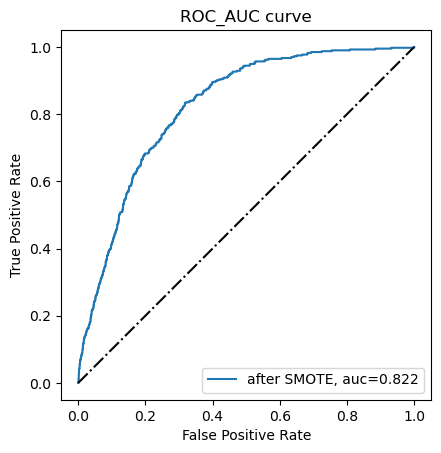

In [58]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba)
plt.plot(fpr,tpr,label="after SMOTE, auc="+str(roc_auc_test.round(3)))

plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),linestyle='-.',color='k')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC curve")

plt.legend(loc=4)
plt.show()

zrobic automatyzacje eksperymentow na spsoob sprawdzania hiperparam grupwoania 


w OneHot ma parametr ktory grupije najczestsze (to co ja zrobielm recznie)


idac dalej

wiecej eksperymentow na postac danych  czyli jak mam City. Mozna zrobic inny wariant i pogrupowac na kategorie : duze miasto, male, srednie,

mozna rpobowac robic z klasa imbalance

zaproponowac rozne metody oblsugi braku danych 

dostawic kolumne 0/1 tam gdzie wypelniam supplied z aplied czy byl uzupelnianay 

loadn_amount subbmited skategoryzowac i spfwdzac czy w aplied jest wiecej, mniej 

porzadkowanie kodu / fumckej analityczne / f. 

komentarze, wnioski

f1 spojrzeć na końcu podsumowanie


# -----------------------------------------------------------------------------------